<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E5%AE%9F%E5%8A%9B%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- コンバージョン(購入や反応など)が高い可能性のある顧客に絞ってプロモーションを実施する
- どのユーザーに焦点を当てるかを分析する

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#データの読み込み
df = pd.read_csv('exercise.csv')
df.head()
df.shape

(64000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
df.isnull().sum()

,0
recency,0
history,0
used_discount,0
used_bogo,0
zip_code,0
is_referral,0
channel,0
offer,0
conversion,0


- カテゴリカル変数の処理

In [ ]:
df.select_dtypes(include='object').columns

Index(['zip_code', 'channel', 'offer'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# LabelEncoder インスタンスを作成
label_encoder = LabelEncoder()

In [ ]:
# 数値化したいカテゴリ列を一つずつ変換
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,1,0,1,0,0
1,6,329.08,1,1,0,1,2,2,0
2,7,180.65,0,1,1,1,2,0,0
3,9,675.83,1,0,0,1,2,1,0
4,2,45.34,1,0,2,0,2,0,0


# 変換されたもの


* zip_code  
 *   Rural -> 0
 *   Surburban -> 1
 *   Urban -> 2

* channel
 *   Multichannel -> 0
 *   Phone -> 1
 *   Web -> 2

* offer
 * Buy One Get One -> 0
 * Discount -> 1
 * No offer -> 2


# 基本統計量の確認

In [ ]:
#基本統計量
df.describe()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,1.251531,0.502250,1.319609,0.998734,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.697936,0.499999,0.678254,0.816754,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000


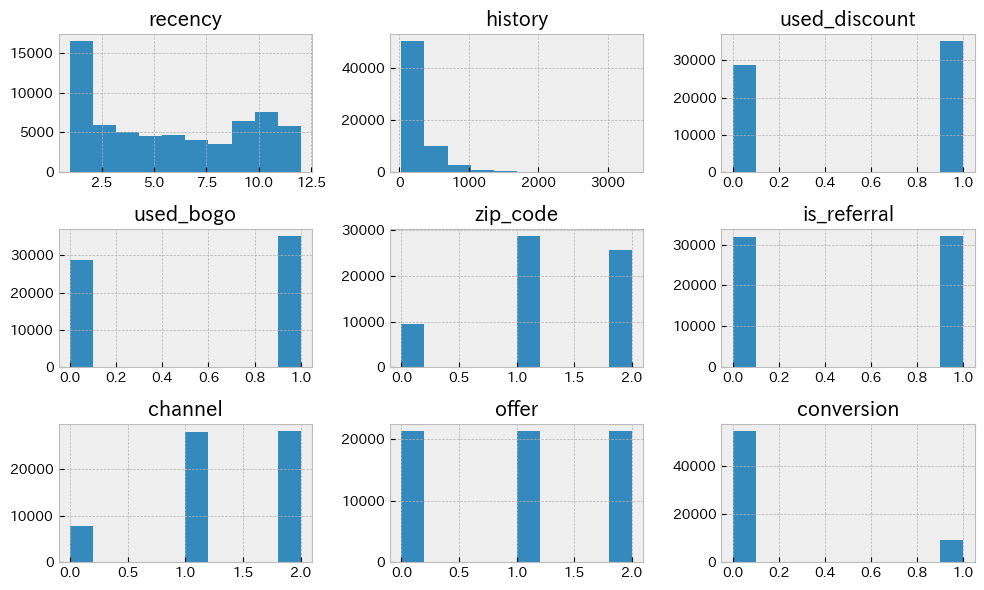

In [ ]:
df.hist()
plt.tight_layout();

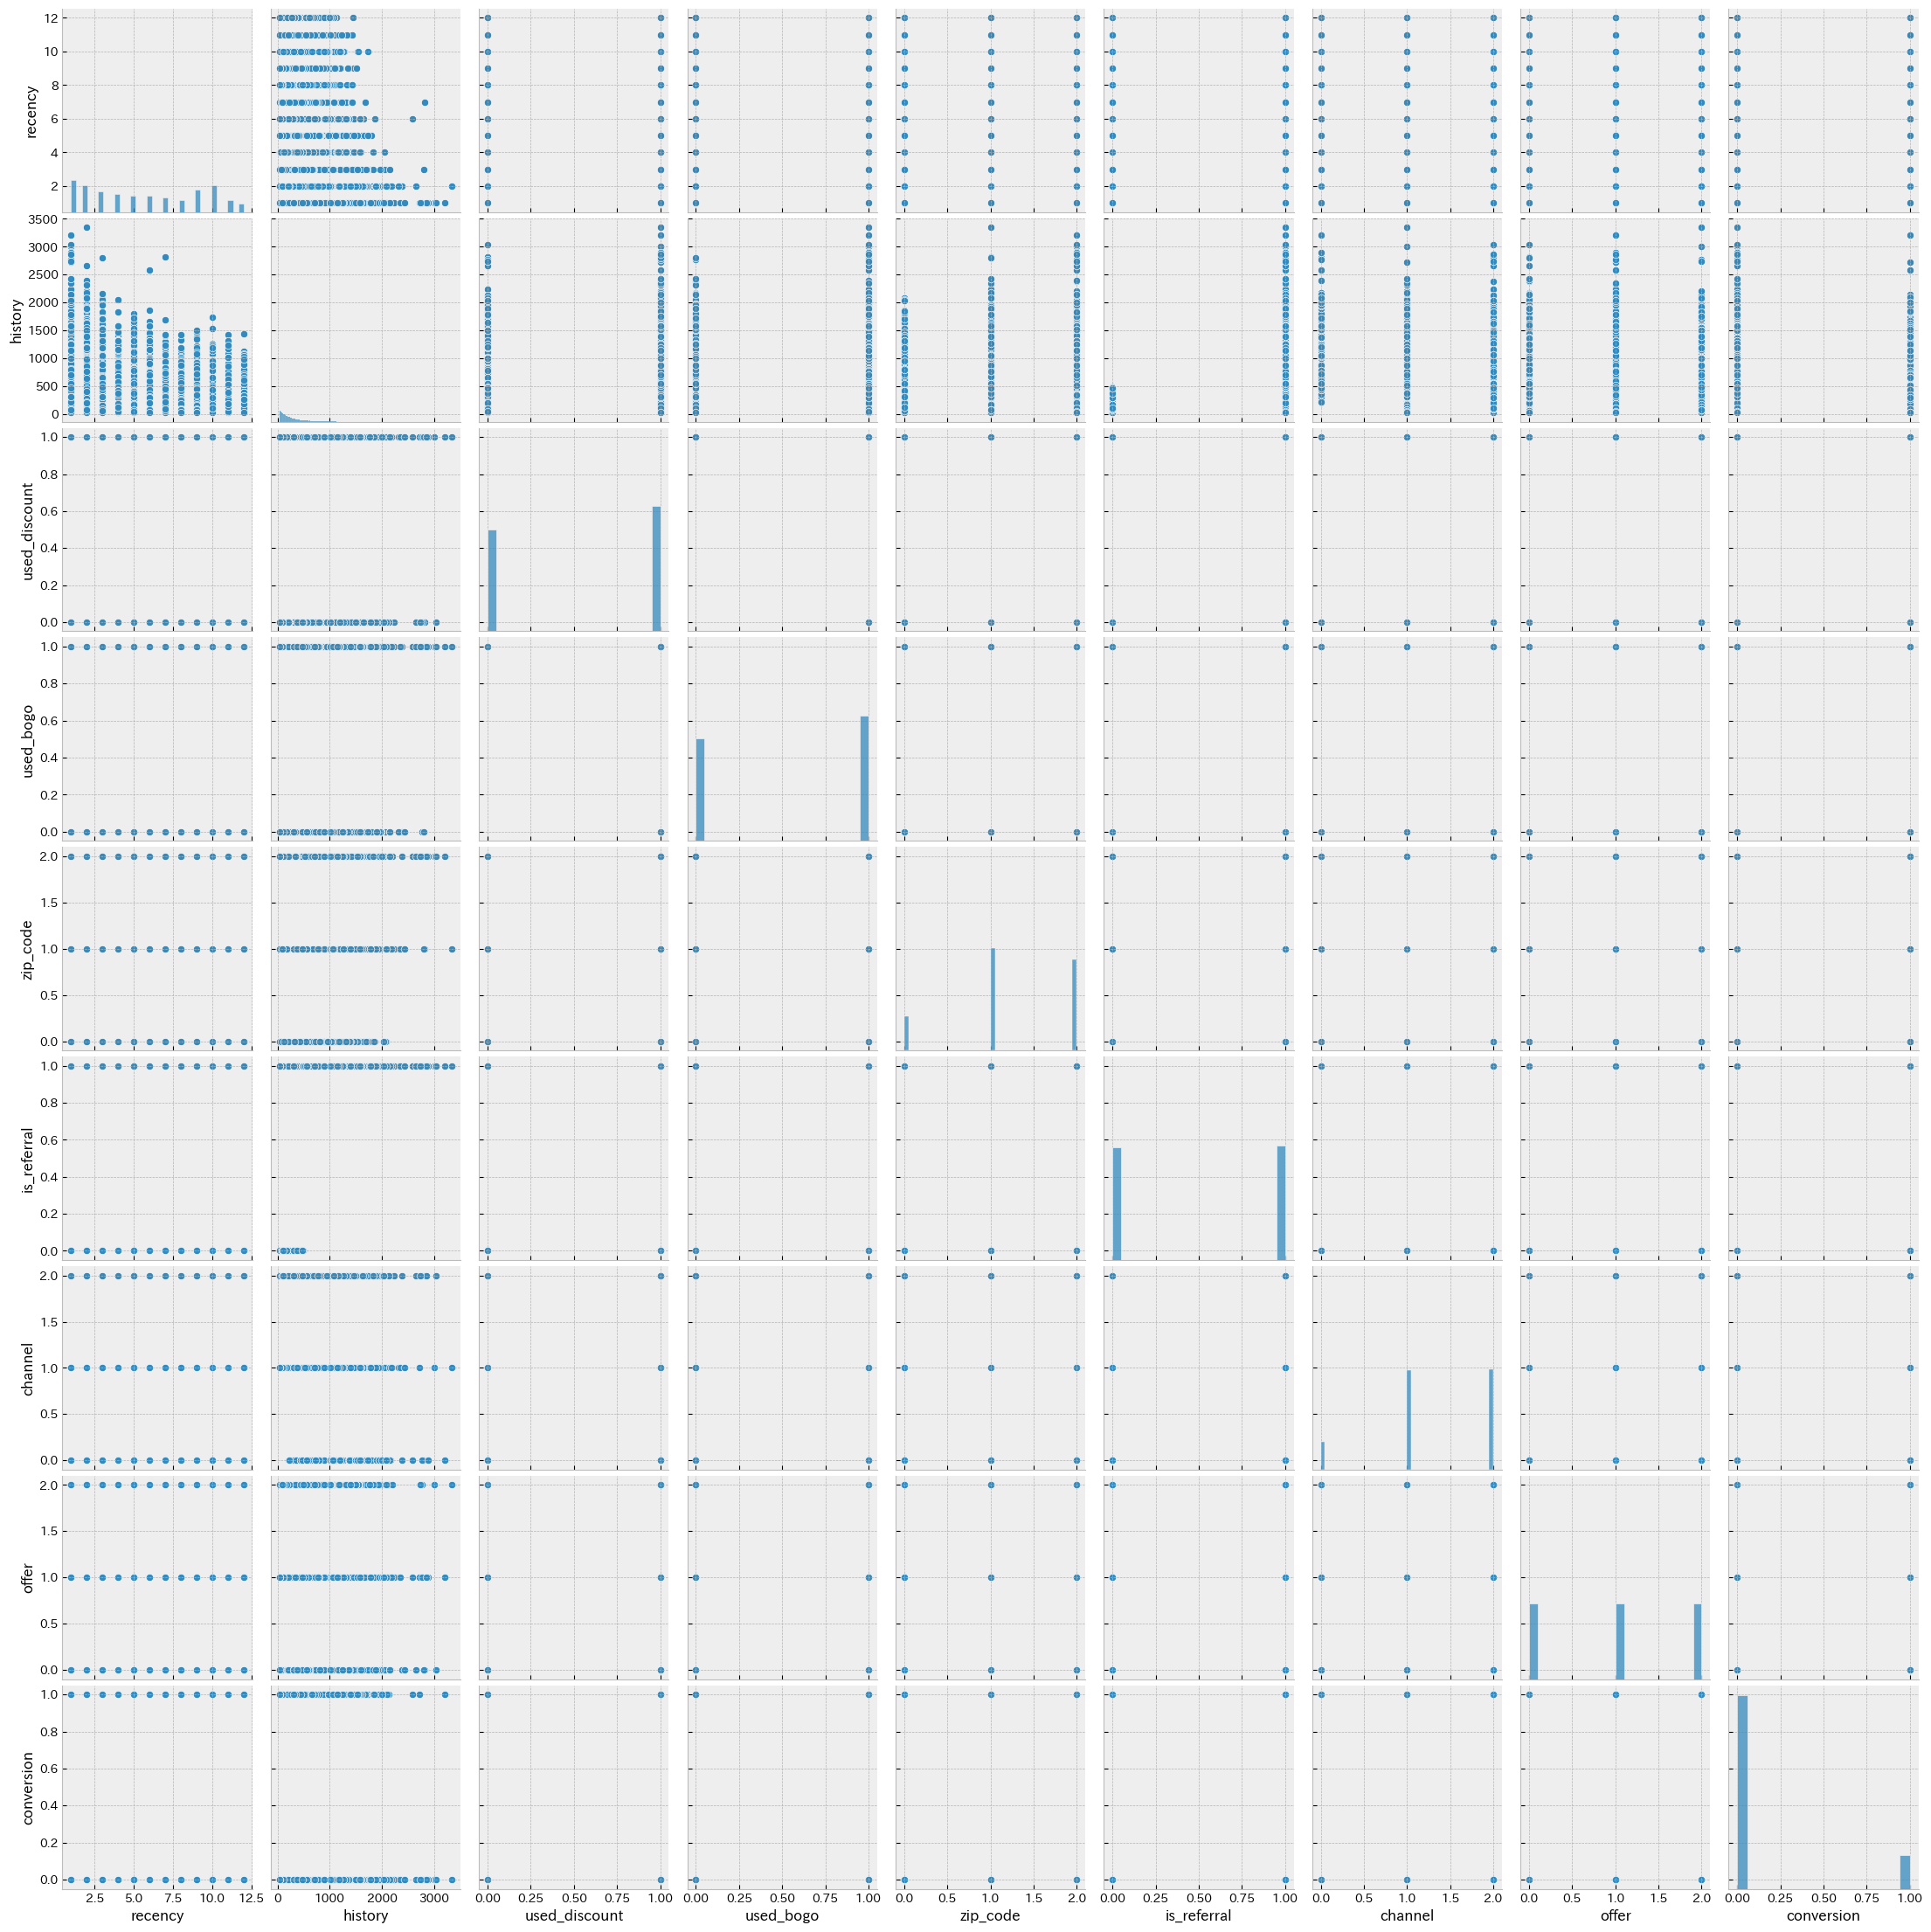

In [ ]:
sns.pairplot(df)

# 各セグメントがコンバージョンに与える影響

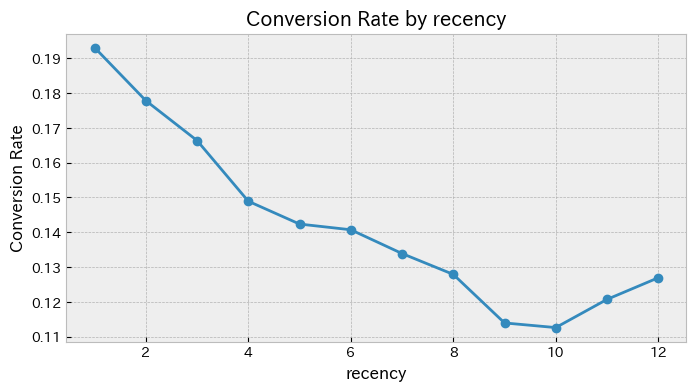

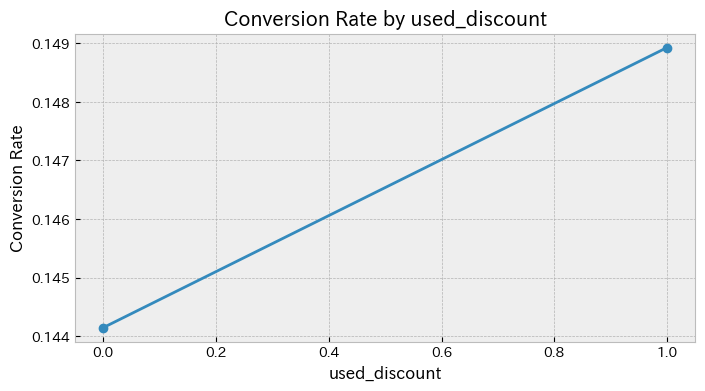

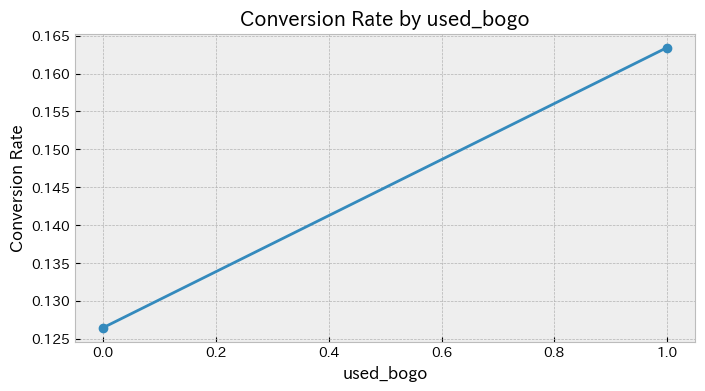

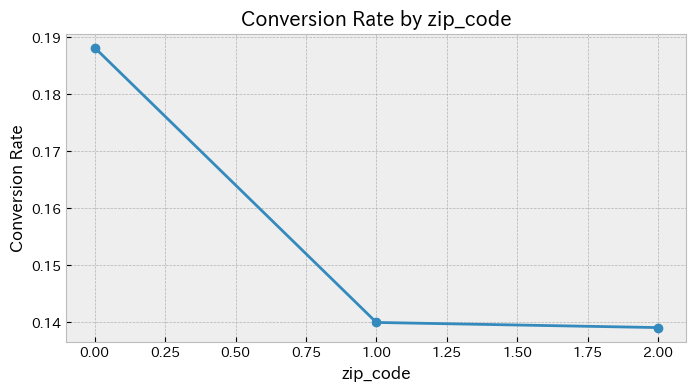

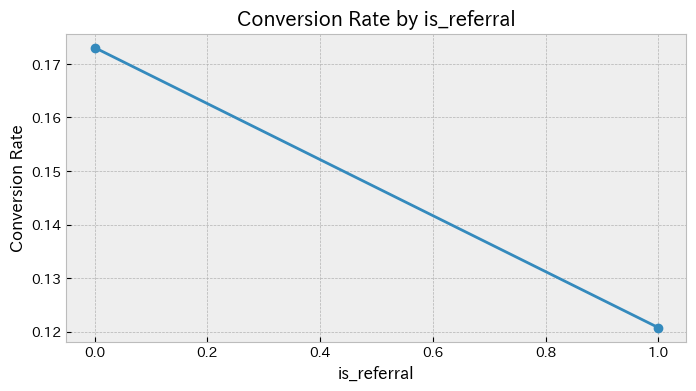

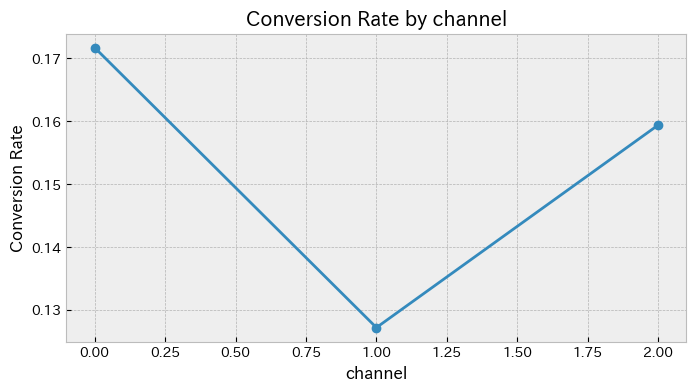

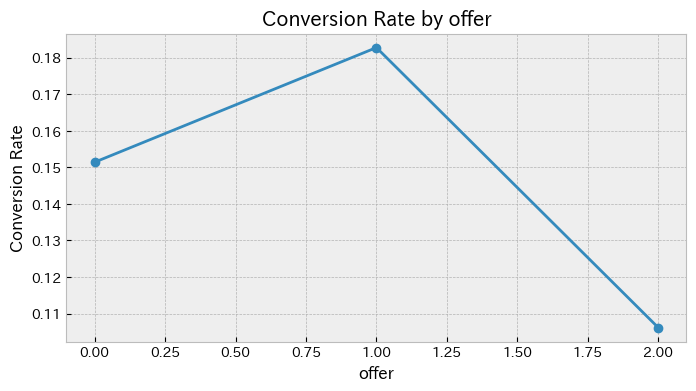

In [ ]:
for col in df.columns:
  # 'conversion'カラムは削除,'history'カラムは幅がありすぎるため削除
  if col == 'conversion':
    continue
  if col == 'history':
    continue

  # 指定したカラムのconversionの平均
  conversion_rate = df.groupby(col)['conversion'].mean()
  plt.figure(figsize=(8, 4))
  plt.plot(conversion_rate.index, conversion_rate.values, marker='o')
  plt.title(f'Conversion Rate by {col}')
  plt.xlabel(col)
  plt.ylabel('Conversion Rate')
  plt.grid(True)
  plt.show()

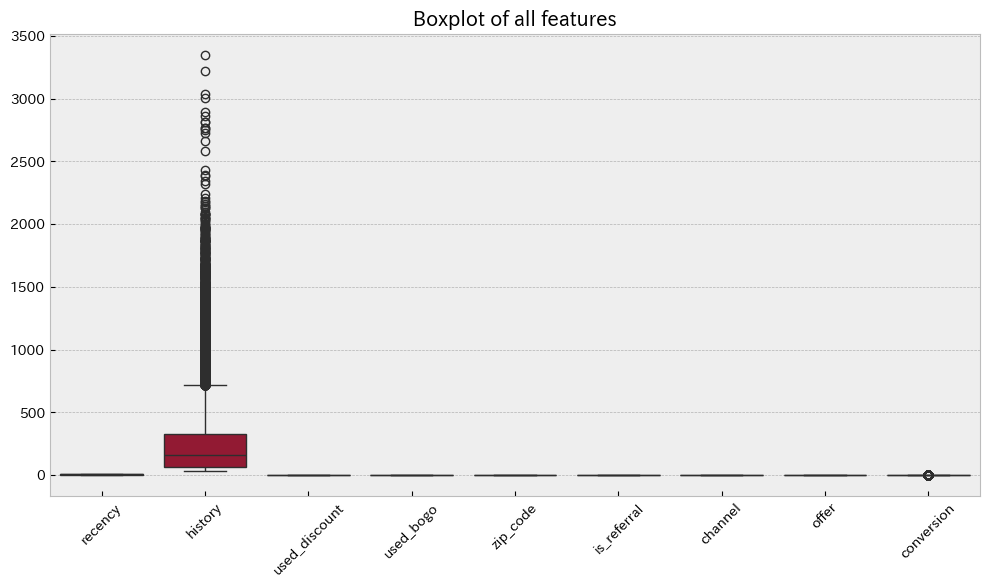

In [ ]:
# 箱ひげ図：各変数の分布と外れ値を確認
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of all features")
plt.show()


# クロス集計

In [ ]:
for col in df.columns:
    if col != "conversion":
        print(f"--- {col} と conversion のクロス集計 ---")
        ct = pd.crosstab(df[col], df["conversion"])
        print(ct)
        print("\n" + "="*50 + "\n")
        conversion_rate = (ct[1] / ct.sum(axis=1))*100
        print("\n各グループのコンバージョン率:")
        print(conversion_rate)
        print("\n")

--- recency と conversion のクロス集計 ---
conversion     0     1
recency               
1           7224  1728
2           6197  1340
3           4922   982
4           4321   756
5           3868   642
6           3957   648
7           3532   546
8           3048   447
9           5707   734
10          6713   852
11          3081   423
12          2036   296



各グループのコンバージョン率:
recency
1     19.302949
2     17.778957
3     16.632791
4     14.890683
5     14.235033
6     14.071661
7     13.388916
8     12.789700
9     11.395746
10    11.262393
11    12.071918
12    12.692967
dtype: float64


--- history と conversion のクロス集計 ---
conversion     0    1
history              
29.99       6988  959
30.00          2    0
30.01          4    0
30.02          1    0
30.03          1    0
...          ...  ...
2895.11        1    0
3003.48        1    0
3040.20        1    0
3215.97        0    1
3345.93        1    0

[34833 rows x 2 columns]



各グループのコンバージョン率:
history
29.99       12.067447
30.00    

# 正規分布かどうか

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# recencyとhistoryの正規性をShapiro-Wilk検定でチェック
recency_stat, recency_p = shapiro(df['recency'])
history_stat, history_p = shapiro(df['history'])

# 結果を表示
print(f"Recency - Stat: {recency_stat}, p-value: {recency_p}")
print(f"History - Stat: {history_stat}, p-value: {history_p}")

# p値が0.05未満の場合、正規分布に従わないと判断する
if recency_p < 0.05:
    print("Recencyは正規分布に従っていません。ノンパラメトリック手法が必要です。")
else:
    print("Recencyは正規分布に従っています。")

if history_p < 0.05:
    print("Historyは正規分布に従っていません。ノンパラメトリック手法が必要です。")
else:
    print("Historyは正規分布に従っています。")


Recency - Stat: 0.9175367464976929, p-value: 1.6951730717221271e-97
History - Stat: 0.7629511541148102, p-value: 3.78333781894263e-126
Recencyは正規分布に従っていません。ノンパラメトリック手法が必要です。
Historyは正規分布に従っていません。ノンパラメトリック手法が必要です。


In [ ]:
import pandas as pd
from scipy.stats import kstest, norm

# recencyとhistoryのKolmogorov-Smirnov検定
recency_stat, recency_p = kstest(df['recency'], 'norm', args=(df['recency'].mean(), df['recency'].std()))
history_stat, history_p = kstest(df['history'], 'norm', args=(df['history'].mean(), df['history'].std()))

# 結果を表示
print(f"Recency - KS Stat: {recency_stat}, p-value: {recency_p}")
print(f"History - KS Stat: {history_stat}, p-value: {history_p}")

# p値が0.05未満の場合、正規分布に従わないと判断する
if recency_p < 0.05:
    print("Recencyは正規分布に従っていません。ノンパラメトリック手法が必要です。")
else:
    print("Recencyは正規分布に従っています。")

if history_p < 0.05:
    print("Historyは正規分布に従っていません。ノンパラメトリック手法が必要です。")
else:
    print("Historyは正規分布に従っています。")


Recency - KS Stat: 0.13452160850668493, p-value: 0.0
History - KS Stat: 0.2038393089567619, p-value: 0.0
Recencyは正規分布に従っていません。ノンパラメトリック手法が必要です。
Historyは正規分布に従っていません。ノンパラメトリック手法が必要です。


# 検定

- 不等分散のため、マンホイットニーのU検定


- χ二乗検定




- recency・history
 - 帰無仮説：conversionの有無によって対象変数の平均に差がない
 - 対立仮説：conversionの有無によって対象変数の平均に差がある

- カテゴリ変数
 - 帰無仮説：対象のカテゴリ変数とconversionは独立している(関連性がない)
 - 対立仮説：対象のカテゴリ変数とconversionは独立していない(関連性がある)

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency

def test_significance(df):
    results = {}
    for col in df.columns:
        if col == "conversion":
            continue
        print(f"--- {col} と conversion の有意性検定 ---")
        # 連続変数（ここでは recency, history）とそれ以外で処理を分ける
        if col in ['recency', 'history']:
            group0 = df[df['conversion'] == 0][col]
            group1 = df[df['conversion'] == 1][col]
            # マン・ホイットニーU検定
            stat, p_val = mannwhitneyu(group0, group1)

            print(f"U Stat: {stat:.3e}, p-value: {p_val:.3e}")

        else:
            # カテゴリ変数の場合、クロス集計表を作成してカイ二乗検定
            contingency_table = pd.crosstab(df[col], df["conversion"])
            chi2, p_val, dof, expected = chi2_contingency(contingency_table)
            print(f"カイ二乗検定: χ²値 = {chi2:.3f}, 自由度 = {dof}, p値 = {p_val:.3e}")
            results[col] = {"test": "chi2", "chi2": chi2, "dof": dof, "p_val": p_val}
        print()
    return results


In [ ]:
test_significance(df)

--- recency と conversion の有意性検定 ---
U Stat: 2.880e+08, p-value: 1.365e-81

--- history と conversion の有意性検定 ---
U Stat: 2.272e+08, p-value: 2.006e-70

--- used_discount と conversion の有意性検定 ---
カイ二乗検定: χ²値 = 2.845, 自由度 = 1, p値 = 9.164e-02

--- used_bogo と conversion の有意性検定 ---
カイ二乗検定: χ²値 = 172.756, 自由度 = 1, p値 = 1.851e-39

--- zip_code と conversion の有意性検定 ---
カイ二乗検定: χ²値 = 153.508, 自由度 = 2, p値 = 4.637e-34

--- is_referral と conversion の有意性検定 ---
カイ二乗検定: χ²値 = 349.326, 自由度 = 1, p値 = 5.940e-78

--- channel と conversion の有意性検定 ---
カイ二乗検定: χ²値 = 160.697, 自由度 = 2, p値 = 1.274e-35

--- offer と conversion の有意性検定 ---
カイ二乗検定: χ²値 = 504.461, 自由度 = 2, p値 = 2.869e-110



{'used_discount': {'test': 'chi2',
  'chi2': np.float64(2.8452499347404023),
  'dof': 1,
  'p_val': np.float64(0.0916443416336384)},
 'used_bogo': {'test': 'chi2',
  'chi2': np.float64(172.7557392727885),
  'dof': 1,
  'p_val': np.float64(1.8506024687525873e-39)},
 'zip_code': {'test': 'chi2',
  'chi2': np.float64(153.50767890534956),
  'dof': 2,
  'p_val': np.float64(4.636935563366961e-34)},
 'is_referral': {'test': 'chi2',
  'chi2': np.float64(349.3264372550735),
  'dof': 1,
  'p_val': np.float64(5.940429321710465e-78)},
 'channel': {'test': 'chi2',
  'chi2': np.float64(160.69711674409655),
  'dof': 2,
  'p_val': np.float64(1.2736921440078863e-35)},
 'offer': {'test': 'chi2',
  'chi2': np.float64(504.46066903563496),
  'dof': 2,
  'p_val': np.float64(2.869178384267155e-110)}}

# t検定の結果
- recency
 - t値 = 19.040, p値 = 9.892e-80
 - p値が非常に小さいため、帰無仮説は棄却され、conversion の有無によって recency の平均に有意な差がある
 -  conversion するユーザーは直近に利用している傾向が強い

- history
 - t値 = -15.269, p値 = 3.785e-52
 - p値が非常に小さいため、帰無仮説は棄却され、conversion の有無によって history の平均に有意な差がある
 - conversion するユーザーは過去の購入金額が高い

# カテゴリ変数の結果
- used_discount
 - χ²値 = 2.845, 自由度 = 1, p値 = 9.164e-02
 - p値が 0.05 を上回るため、帰無仮説を棄却できず、used_discount と conversion の間には統計的に有意な関連性はない
 - 割引利用の有無がconversionに直接影響していない

- used_bogo
 - χ²値 = 172.756, 自由度 = 1, p値 = 1.851e-39
 - p値が非常に小さいため、帰無仮説は棄却され、used_bogo と conversion の間に有意な関連性がある
 - 過去に BOGO を利用したユーザーは conversion 率が高い傾向があるため、ターゲティングに有用

- zip_code
 - χ²値 = 153.508, 自由度 = 2, p値 = 4.637e-34
 - p値が非常に小さいため、帰無仮説は棄却され、地域によってconversionに影響を与える
 - 地域別のマーケティング戦略の検討が必要である

- is_referral
 - χ²値 = 349.326, 自由度 = 1, p値 = 5.940e-78
 - p値が非常に小さいため、帰無仮説は棄却され、紹介経由の有無とconversionの間に有意性がある。
 - 紹介経由のユーザーの扱いに工夫が必要

- channel
 - χ²値 = 160.697, 自由度 = 2, p値 = 1.274e-35
 - p値が非常に小さいため、帰無仮説は棄却され、各チャンネル間でconversionの分布に統計的有意性が認められる。
 - どのチャネルが効果的かを把握し、チャネル別に戦略を最適化する必要がある

- offer
 - χ²値 = 504.461, 自由度 = 2, p値 = 2.869e-110
 - p値が非常に小さいため、帰無仮説は棄却され、offerの種類とconversionの間に明確な関連性がある。
 - どのオファーが最も効果的かを特定し、プロモーション内容の最適化に活かすべき

- offer > recency > is_referral > history > used_bogo > channel > zip_code > used_discount

# 相関係数

In [ ]:
df.corr()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
recency,1.000000,-0.246591,-0.031336,-0.026617,-0.003138,-0.052106,0.076850,-0.002112,-0.074765
history,-0.246591,1.000000,0.112677,0.114685,0.002732,0.223279,-0.290378,-0.002635,0.065153
used_discount,-0.031336,0.112677,1.000000,-0.816943,0.001733,0.020900,-0.043368,0.003524,0.006712
used_bogo,-0.026617,0.114685,-0.816943,1.000000,0.001378,0.021346,-0.039567,-0.002018,0.051999
zip_code,-0.003138,0.002732,0.001733,0.001378,1.000000,0.003393,-0.007627,0.001326,-0.037570
is_referral,-0.052106,0.223279,0.020900,0.021346,0.003393,1.000000,-0.055314,-0.001045,-0.073924
channel,0.076850,-0.290378,-0.043368,-0.039567,-0.007627,-0.055314,1.000000,0.000505,0.010584
offer,-0.002112,-0.002635,0.003524,-0.002018,0.001326,-0.001045,0.000505,1.000000,-0.052119
conversion,-0.074765,0.065153,0.006712,0.051999,-0.037570,-0.073924,0.010584,-0.052119,1.000000


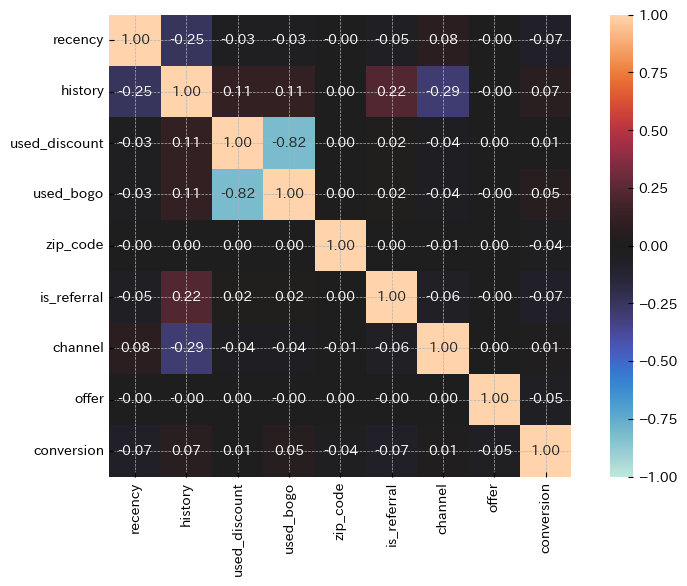

In [ ]:
# 相関分析
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

- 相関係数からは何とも言えない

# 重回帰分析

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x = df.drop("conversion", axis = 1)
y = df["conversion"]

In [ ]:
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=df.drop('conversion', axis=1).columns)
feature.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer
0,1.207751,-0.389003,0.902651,-1.104914,-0.360396,-1.00451,-0.471227,-1.222819
1,0.067359,0.339614,0.902651,0.905048,-1.793203,0.99551,1.003158,1.225918
2,0.352457,-0.239836,-1.107848,0.905048,-0.360396,0.99551,1.003158,-1.222819
3,0.922653,1.693278,0.902651,-1.104914,-1.793203,0.99551,1.003158,0.001550
4,-1.073034,-0.768068,0.902651,-1.104914,1.072412,-1.00451,1.003158,-1.222819


In [ ]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     229.7
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:06:15   Log-Likelihood:                -23424.
No. Observations:               64000   AIC:                         4.687e+04
Df Residuals:                   63991   BIC:                         4.695e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1468      0.001    106.417      0.000       0.144       0.149
recency          -0.0221      0.001    -15.528      0.000      -0.025      -0.019
history           0.0173      0.002     10.727      0.000       0.014       0.020
used_discount     0.0449      0.003     17.511      0.000       0.040       0.050
used_bogo         0.0537      0.003     20.930      0.000       0.049       0.059
zip_code         -0.0133      0.001     -9.666      0.000      -0.016      -0.011
is_referral      -0.0325      0.001    -22.990      0.000      -0.035      -0.030
channel           0.0127      0.001      8.773      0.000       0.010       0.015
offer            -0.0185      0.001    -13.425      0.000      -0.021      -0.016
==============================================================================
Omnibus:                    20669.348   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48411.660
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                       4.879   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 自由度調整済み決定係数
result.rsquared_adj

np.float64(0.027795755780582354)

In [ ]:
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values

,t,p,coef
recency,-15.527928,2.821358e-54,-0.022101
history,10.726760,8.033485e-27,0.017314
used_discount,17.510535,1.721263e-68,0.044920
used_bogo,20.929919,6.052533e-97,0.053701
zip_code,-9.665845,4.360395e-22,-0.013333
is_referral,-22.990311,1.732384e-116,-0.032538
channel,8.772574,1.788196e-18,0.012652
offer,-13.425349,4.882561e-41,-0.018518


### 各変数の結果と解釈

- **is_referral**  
  - **t値:** -22.99  
  - **p値:** 1.73e-116  
  - **係数:** -0.03254  
  - **解釈:**  
    - 非常に有意（p値が極めて小さい）で、係数が負のため、is_referral（紹介経由）が1の場合、conversion の確率が約0.03254低下すると解釈できます。  
    - つまり、紹介経由のユーザーは、他の条件を一定にした場合、conversion においてやや不利な傾向があると読み取れます。

- **used_bogo**  
  - **t値:** 20.93  
  - **p値:** 6.05e-97  
  - **係数:** 0.05370  
  - **解釈:**  
    - 非常に有意で、係数が正です。つまり、過去に「Buy One Get One」を利用したユーザーは conversion の確率が約0.05370上昇する傾向があります。  
    - この変数は conversion に対して最も強い正の影響を与えているといえます。

- **used_discount**  
  - **t値:** 17.51  
  - **p値:** 1.72e-68  
  - **係数:** 0.04492  
  - **解釈:**  
    - 非常に有意で正の係数を示しており、過去に割引を利用したユーザーは conversion の可能性が高くなる（約0.04492増加）と解釈できます。  
    - 単体のクロス集計では有意差が見られなかったかもしれませんが、他の変数と合わせた場合には影響が現れているようです。

- **recency**  
  - **t値:** -15.53  
  - **p値:** 2.82e-54  
  - **係数:** -0.02210  
  - **解釈:**  
    - 非常に有意で、係数が負であることから、recency（最後の利用からの経過日数）が大きいほど conversion の確率は低くなります。  
    - つまり、最近利用したユーザーのほうが conversion しやすいことを示しています。

- **offer**  
  - **t値:** -13.43  
  - **p値:** 4.88e-41  
  - **係数:** -0.01852  
  - **解釈:**  
    - 非常に有意ですが、ここでの offer は label encoding によって数値化されているため、符号の解釈は注意が必要です。  
    - 一般に、エンコードされた値が大きくなる（＝特定のオファーカテゴリ）と conversion の確率が低くなる傾向があると解釈できます。  
    - オファー内容が conversion に大きな影響を与える重要な要素であることは示されています。

- **history**  
  - **t値:** 10.73  
  - **p値:** 8.03e-27  
  - **係数:** 0.01731  
  - **解釈:**  
    - 有意で正の係数から、過去の購入金額（history）が大きいユーザーは conversion の確率がわずかに高くなる傾向にあると解釈できます。

- **zip_code**  
  - **t値:** -9.67  
  - **p値:** 4.36e-22  
  - **係数:** -0.01333  
  - **解釈:**  
    - 有意で、エンコードされた zip_code の値が大きくなると conversion の確率が低くなることを示しています。  
    - ただし、元のカテゴリ（例：Rural, Suburban, Urban）の意味を考慮すると、どの地域が優位かはエンコード順序に依存するため、具体的な意味付けは注意が必要です。

- **channel**  
  - **t値:** 8.77  
  - **p値:** 1.79e-18  
  - **係数:** 0.01265  
  - **解釈:**  
    - 有意で正の係数であり、チャネル（Web, Phone, Multichannel など）の違いが conversion にもわずかに影響を与えていることがわかります。  
    - チャネルのエンコード順序にも注意が必要ですが、あるチャネルの利用が conversion に対してややプラスの効果をもたらすと読み取れます。

